<div style="background-color:#FFFDD0; border-radius:18px; padding:15px; ">
<h4 style="margin-left: 8%; color:#000130; "> CA03  -  <i>Artificial Intelligence Course</i>  -      Dr. Fadaei 
<br>
<b> Mohammad Montazeri - 810699269 </b> - Fall 1402 </h4>

<h1 style="text-align: center; color:#000130; "> Reinforcement Learning </h1>
<br>
</div>


# Table of Contents
* [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
* [Part 2: Q-Learning Algorithm](#2)
    - [َQuestion 7:](#2-0)
    - [َQuestion 8:](#2-1)
    - [َQuestion 9:](#2-2)
    - [َQuestion 10:](#2-3)


## Libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import gym

<a name='1'></a>

## Part 1: Value Iteration & Policy Iteration Algorithms


In [2]:
# Defining the hyperparameters of the problem
axes_states = 4
total_states = axes_states * axes_states
discount_factor = 0.9
iterations = 100
action_symbols = ["←", "↓", "→", "↑"]
action_space = {0: "LEFT", 1: "DOWN", 2: "RIGHT", 3: "UP"}

# Introducing the environment of the problem
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4",
               is_slippery=False, new_step_api=True)

# Getting familiar with the environment
print("you can see the environment in each step by render command")
initial_state = env.reset()
# env.render()

# Total no. of states
print(env.observation_space.n)

# Total no. of actions
print(env.action_space.n)

you can see the environment in each step by render command
16
4


<a name='1-0'></a>

### Question 1:


### Value Iteration Method

The Value Iteration method is a dynamic programming algorithm applied in Reinforcement Learning (RL) to determine the optimal value function and policy. Through iterative updates, the algorithm refines the value assigned to each state in the environment until reaching convergence, indicating stabilization where state values exhibit minimal change between iterations.  
The procedural steps of the Value Iteration algorithm are outlined as follows:

1. Initialize the value of each state to 0.
2. For each state, compute the expected return by evaluating all possible actions. This expected return is the sum of the reward and the discounted value of the subsequent state for each potential action, weighted by the probability associated with that action.
3. Update the state's value to be the maximum expected return.
4. Repeat steps 2 and 3 until the value of each state converges, defined as the maximum difference in value between iterations being less than a predefined small threshold.

The Bellman equation serves as the mechanism to update the value of each state. This recursive equation expresses the state's value as the sum of the immediate reward and the discounted value of the next state, weighted by the probability of transitioning to that next state. Here is the equation:
$$V(s) = \max_{a} \sum_{s', r} p(s', r|s, a)[r + \gamma V(s')]$$
where:

* $V(s)$ is the value of state $s$
* $a$ is the action taken
* $s'$ is the resulting state
* $r$ is the reward received
* $p(s', r|s, a)$ is the probability of transitioning to state $s'$ and receiving reward $r$ from state $s$ when taking action $a$
* $\gamma$ is the discount factor that trades off immediate versus future rewards

### Attaining the Optimal Policy via Value Iteration

Upon convergence of the value function, the optimal policy can be derived by selecting the action that maximizes the expected return for each state. This optimal policy serves as a mapping from each state to the action that yields the highest expected return. Consequently, this action represents the one offering the maximum expected reward when commencing from the given state and adhering to the optimal policy thereafter.


<a name='1-1'></a>

### Question 2:


In [3]:
class ValueIteration:
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = (
            np.ones((self.env.observation_space.n)) / self.env.action_space.n
        )
        self.q_values = (
            np.ones((self.env.observation_space.n, self.env.action_space.n))
            / self.env.action_space.n
        )
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros(
            (self.env.action_space.n)
        )

    def value_estimation(self):
        self.delta = np.inf

        while self.delta > self.theta:
            self.delta = 0

            for state in range(self.env.observation_space.n):
                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][
                        action
                    ]:
                        if done:
                            action_value += reward
                        else:
                            action_value += probability * (
                                reward
                                + self.discount_factor *
                                self.state_values[next_state]
                            )

                    self.q_values[state, action] = action_value

                self.state_values[state] = np.max(self.q_values[state, :])

                self.delta = np.max(
                    [self.delta, abs(v - self.state_values[state])])

    def take_action(self, action):
        next_state, reward, done, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state, :])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-12'></a>

### Question 3:


### Policy Iteration Method

In RL, a **policy** acts as a strategy dictating the agent's behavior at any given moment, essentially functioning as a mapping from *states* to *actions*. Policy Iteration serves as a crucial algorithm in Reinforcement Learning (RL) aimed at discovering the optimal policy. The Policy Iteration algorithm unfolds in two distinct steps as:

1. **Policy Evaluation** which involves assessing the existing policy by computing the expected return (or value function) for each state under the current policy. The expected return for a state is the cumulative sum of rewards obtained by adhering to the policy from that specific state onward. This iterative process continues until the value function converges to its optimal counterpart.
2. **Policy Improvement** which causes the current policy undergo an enhancement by selecting a new action for each state, aiming to maximize the expected return. This iterative refinement persists until the policy stabilizes, signifying convergence to the optimal policy. The algorithm's complexity is directly proportional to the number of states, actions, and iterations essential for convergence. The maximum iteration count corresponds to the product of the number of states and actions.

### Attaining the Optimal Policy via Policy Iteration

The initiation of the Policy Iteration algorithm involves the selection of an arbitrary policy. It subsequently engages in a cyclic process alternating between policy evaluation and policy improvement. In each iteration, the algorithm begins by evaluating the existing policy, determining the expected return for each state. Following this evaluation, it proceeds to enhance the policy by choosing actions that maximize the expected return for each state. This iterative sequence persists until the policy undergoes no further changes. At this juncture, the algorithm concludes that the policy has converged to its optimal state.


<a name='1-2'></a>

### Question 4:


In [4]:
class PolicyIteration:
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = (
            np.ones((self.env.observation_space.n)) / self.env.action_space.n
        )
        self.q_values = (
            np.ones((self.env.observation_space.n, self.env.action_space.n))
            / self.env.action_space.n
        )
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros(
            (self.env.action_space.n)
        )
        self.policy = np.random.randint(
            self.env.action_space.n, size=self.env.observation_space.n
        )  # initial policy
        self.policy_stable = False

    def policy_evaluation(self):
        self.delta = np.inf

        while self.delta >= self.theta:
            self.delta = 0

            for state in range(self.env.observation_space.n):
                v = self.state_values[state]

                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][
                    self.policy[state]
                ]:
                    new_state_value += probability * (
                        reward + self.discount_factor *
                        self.state_values[next_state]
                    )

                self.state_values[state] = new_state_value

                self.delta = np.max(
                    [self.delta, abs(v - self.state_values[state])])

    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):
                action_value = 0

                for probability, next_state, reward, done in self.env.P[state][action]:
                    action_value += probability * (
                        reward + self.discount_factor *
                        self.state_values[next_state]
                    )

                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state, :])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False

        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()

    def take_action(self, action):
        next_state, reward, done, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values

    def reset(self):
        initial_state = self.env.reset()
        return initial_state

<a name='1-3'></a>

### Question 5:


In [5]:
# A function we'll use to show the results of our algorithms as a visual map
def visualize(optimalPolicy):
    map = ''
    for i in range(axes_states):
        if i: 
            map += '\n'
        map += ((4 * axes_states) * '-' + '-\n| ')
        for j in range(axes_states):
            act = action_symbols[optimalPolicy[axes_states * i + j]]
            map += f'{act} | '
    map += ('\n' + (4 * axes_states) * '-' + '-')
    print(map)



# A function we'll use to print the results of our algorithms as a table
def tabulate(optimalPolicy, decimal=4):
    for index, x in enumerate(optimalPolicy):
        if (index+1)%axes_states:
            print(f'{x:.{decimal}f}', end='\t')
        else:
            print(f'{x:.{decimal}f}')


<a name='1-3-1'></a>

#### Value Iteration:


In [7]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='ansi', new_step_api=True)
value_iteration = ValueIteration(env, discount_factor)
value_iteration.value_estimation()

V_s = value_iteration.get_state_values()
print('V(s):')
tabulate(V_s)
print()

Q_sa = value_iteration.get_q_values()
print('Q(s, a):')
for data in Q_sa: tabulate(data)
print()

PI_star = [value_iteration.get_optimal_policy(x) for x in range(total_states)]
print('Optimal Policy: (backend representation)')
tabulate(PI_star, 0)
print()

print('Optimal Policy: (graphical representation)')
visualize(PI_star)

V(s):
0.5905	0.6561	0.7290	0.6561
0.6561	0.0000	0.8100	0.0000
0.7290	0.8100	0.9000	0.0000
0.0000	0.9000	1.0000	0.0000

Q(s, a):
0.5314	0.5905	0.5905	0.5314
0.5314	0.0000	0.6561	0.5905
0.5905	0.7290	0.5905	0.6561
0.6561	0.0000	0.5905	0.5905
0.5905	0.6561	0.0000	0.5314
0.0000	0.0000	0.0000	0.0000
0.0000	0.8100	0.0000	0.6561
0.0000	0.0000	0.0000	0.0000
0.6561	0.0000	0.7290	0.5905
0.6561	0.8100	0.8100	0.0000
0.7290	0.9000	0.0000	0.7290
0.0000	0.0000	0.0000	0.0000
0.0000	0.0000	0.0000	0.0000
0.0000	0.8100	0.9000	0.7290
0.8100	0.9000	1.0000	0.8100
0.0000	0.0000	0.0000	0.0000

Optimal Policy: (backend representation)
1	2	1	0
1	0	1	0
2	1	1	0
0	2	2	0

Optimal Policy: (graphical representation)
-----------------
| ↓ | → | ↓ | ← | 
-----------------
| ↓ | ← | ↓ | ← | 
-----------------
| → | ↓ | ↓ | ← | 
-----------------
| ← | → | → | ← | 
-----------------


<a name='1-3-2'></a>

#### Policy Iteration:


In [8]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, new_step_api=True)
policy_iteration = PolicyIteration(env, discount_factor)
policy_iteration.policy_estimation()

V_s = policy_iteration.get_state_values()
print('V(s):')
tabulate(V_s)
print()

Q_sa = policy_iteration.get_q_values()
print('Q(s, a):')
for data in Q_sa: tabulate(data)
print()

PI_star = [policy_iteration.get_optimal_policy(x) for x in range(total_states)]
print('Optimal Policy: (backend representation)')
tabulate(PI_star, 0)
print()

print('Optimal Policy: (graphical representation)')
visualize(PI_star)

V(s):
0.5905	0.6561	0.7290	0.6561
0.6561	0.0000	0.8100	0.0000
0.7290	0.8100	0.9000	0.0000
0.0000	0.9000	1.0000	0.0000

Q(s, a):
0.5314	0.5905	0.5905	0.5314
0.5314	0.0000	0.6561	0.5905
0.5905	0.7290	0.5905	0.6561
0.6561	0.0000	0.5905	0.5905
0.5905	0.6561	0.0000	0.5314
0.0000	0.0000	0.0000	0.0000
0.0000	0.8100	0.0000	0.6561
0.0000	0.0000	0.0000	0.0000
0.6561	0.0000	0.7290	0.5905
0.6561	0.8100	0.8100	0.0000
0.7290	0.9000	0.0000	0.7290
0.0000	0.0000	0.0000	0.0000
0.0000	0.0000	0.0000	0.0000
0.0000	0.8100	0.9000	0.7290
0.8100	0.9000	1.0000	0.8100
0.0000	0.0000	0.0000	0.0000

Optimal Policy: (backend representation)
1	2	1	0
1	0	1	0
2	1	1	0
0	2	2	0

Optimal Policy: (graphical representation)
-----------------
| ↓ | → | ↓ | ← | 
-----------------
| ↓ | ← | ↓ | ← | 
-----------------
| → | ↓ | ↓ | ← | 
-----------------
| ← | → | → | ← | 
-----------------


<a name='1-4'></a>

### Question 6:


Our goal here is to find the average time consumption of the two utilized algorithms: *Value Iteration* and *Policy Iteration* methods. To do so, we run each of them for 50 episodes and capture each one's total runtime. By dividing the total runtime by number of running episodes (50), we'll get the mean runtime period of each algorithm. 

<a name='1-4-1'></a>

#### Value Iteration:


In [32]:
class color:            # Customize the output's text format in print()
    BOLD = '\033[1;34m' # Set bold and blue text via ANSI escape sequences
    END = '\033[0m'     # Reset text format via ANSI escape sequences
    
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='ansi', new_step_api=True)

TOTAL = 0
for _ in range(50):
    value_iteration = ValueIteration(env, discount_factor)
    start = time.time_ns()
    value_iteration.value_estimation()
    end = time.time_ns()
    TOTAL += (end - start)
env.close()

avg = TOTAL / 50 / 10**6
print(f'Average execution time for Value Iteration: {color.BOLD}{avg}{color.END} milliseconds')

Average execution time for Value Iteration: 12.75904 milliseconds


<a name='1-4-2'></a>

#### Policy Iteration:


In [31]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='ansi', new_step_api=True)

TOTAL = 0
for _ in range(50):
    policy_iteration = PolicyIteration(env, discount_factor)
    start = time.time_ns()
    policy_iteration.policy_estimation()
    end = time.time_ns()
    TOTAL += (end - start)
env.close()

avg = TOTAL / 50 / 10**6
print(f'Average execution time for Policy Iteration: {color.BOLD}{avg}{color.END} milliseconds')

Average execution time for Policy Iteration: 63.057256 milliseconds


#### Comparison of Value Iteration and Policy Iteration
As seen in the previous question, both policy iteration and value iteration algorithms converge to the same optimal policy, which maximizes rewards in the environment.

Value iteration algorithm only requires policy evaluation in each iteration, as it updates the policy directly from the values. On the other hand, policy iteration algorithm needs to perform both policy evaluation and policy improvement in each iteration. This difference in the number of steps required per iteration leads to a difference in the overall convergence speed of the two algorithms. Value iteration algorithm generally converges faster than policy iteration algorithm. This conclusion is also supported in practice from the results obtained in this question. However, it is important to note that the convergence speed of both algorithms can be affected by a number of factors, such as the size of the state space, the number of actions, and the discount factor. In some rare cases, policy iteration algorithm may converge faster than value iteration algorithm.


<a name='2'></a>

## Part 2: Q-Learning Algorithm


In [16]:
# Defining the hyperparameters of the problem
REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 269  # 810699269
ACTION_SPACE = {0: "DOWN", 1: "UP", 2: "RIGHT", 3: "LEFT", 4: "PICKUP", 5: "DROPOFF"}
ACTION_SYMBOLS = ["↓", "↑", "→", "←", "P", "D"]

# Introducing the environment of the problem
env = gym.make("Taxi-v3", new_step_api=True)
# env.seed(seed=STUDENT_NUM)    [This line is replaced with the following line to avoid WARNINGs]
Initial_State = env.reset(seed=STUDENT_NUM)
print(Initial_State)

# Getting familiar with the environment
print("you can see the environment in each step by render command")
# env.render()
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(Initial_State)
print(taxi_row, taxi_col, pass_idx, dest_idx)

# Total no. of states
print(env.observation_space.n)

# Total no. of actions
print(env.action_space.n)

152
you can see the environment in each step by render command
1 2 3 0
500
6


<a name='2-0'></a>

### Question 7:


Q-learning is a reinforcement learning algorithm that finds the optimal policy for an agent. It is model-free, value-based, and off-policy, meaning that it does not require a model of the environment. So, it estimates the value of each state-action pair, and learns from a policy different from the one being executed. The algorithm updates the Q-values, which represent the expected future rewards for taking a particular action in a special state, to maximize the total rewards obtained from the environment.

The Q-learning algorithm follows these steps:
1. **Initialize the Q-table:** The Q-table is a matrix that stores the Q-values for each state-action pair. Initially, all Q-values are set to zero or random values.
2. **Observation:** The agent observes the current state of the environment.
3. **Action selection:** The agent selects an action to perform based on the current state. This can be done using an exploration-exploitation trade-off strategy, where the agent explores new actions with a certain probability and exploits its current knowledge with the remaining probability.
4. **Perform the action:** The agent performs the selected action in the environment.
5. **Receive reward and new state:** The agent receives a reward from the environment based on the action taken and transitions to a new state.
6. **Update the Q-value:** The Q-value for the previous state-action pair is updated using the following formula:

$$ Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \max_a Q(S_{t+1}, a) - Q(S_t, A_t)] $$

where:
- $Q(s, a)$ is the Q-value for state $s$ and action $a$,
- $\alpha$ is the learning rate, 
- $r$ is the reward received, 
- $\gamma$ is the discount factor, 
- $s'$ is the new state, and 
- $\max(Q(s', a'))$ is the maximum Q-value for the new state.

7. **Iteration:** Repeat steps 2-6 until the agent reaches a terminal state or a predefined number of iterations.

The algorithm learns the optimal policy by iteratively updating the Q-values, which represent the expected future rewards for taking a particular action in a special state. The optimal policy is obtained by selecting the action with the highest Q-value for each state.



<a name='2-1'></a>

### Question 8:


In [17]:
class QLearningAgent:
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed, epsilon_decay, learning_rate_decay):
        self.env = env
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        # self.olr = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
        self.seed = seed
        self.epsilon_decay = epsilon_decay
        self.learning_rate_decay = learning_rate_decay

    def choose_action(self, state):
        prob = np.random.rand()
        if prob < self.epsilon:
            action = self.env.action_space.sample()
        else:
            action = self.get_optimal_policy(state)

        return action

    def update_q_table(self, state, action, nextState, reward):
        Q_old = self.q_table[state][action]
        Q_new = Q_old + self.learning_rate * \
            (reward + self.discount_factor *
             np.max(self.q_table[int(nextState), :]) - Q_old)

        self.q_table[state][action] = Q_new

    def decay_epsilon(self, episode):
        self.epsilon = np.exp(-self.epsilon_decay*(episode+1))

    def decrease_learning_rate(self, episode):

        self.learning_rate = 0.99 * \
            np.exp(-self.learning_rate_decay * (episode + 1))

    def take_action(self, action):

        next_state, reward, done, _, _ = self.env.step(action)

        return next_state, reward, done

    def get_optimal_policy(self, state):

        return np.argmax(self.q_table[state])

    def get_q_values(self):

        return self.q_table

    def reset(self):

        # self.learning_rate = self.olr

        return self.env.reset(seed=self.seed)

<style>
    .equation{
        color:black; 
        display:flex; 
        align-items:center; 
        justify-content:center; 
        background-color:SeaShell; 
        border-radius:10px; 
        height:65px; 
        font-size:20px;
    }
</style>

In the `decay_epsilon` function of this class, the value of epsilon is decreased. In the first episode, the value of epsilon is equal to 1. In subsequent episodes, the value of epsilon is equal to the following relationship:

In this class, the `decay_epsilon` function is used when the value of epsilon is needed to be decreased over time. The value of epsilon is initially set to 1 in the first episode, and then updated using the following formula in subsequent episodes:
<div class="equation">  
<p>

$ Epsilon = e^{- (\text{epsilon rate decay} \times \text{episode number})} $

</p>
</div>

Where the value of _epsilon decay rate_ would be set to 0.003 as the `epsilon_decay` argument of the class.

Also, In the `decrease_learning_rate` function of this class, the learning rate is decreased over time. The learning rate is initially set to 0.99 in the first episode, and then updated using the following formula in subsequent episodes:

<div class="equation">  
<p>

$ Learning Rate = 0.99 \times e^{- (\text{learning rate decay} \times \text{episode number})} $

</p>
</div>

Where the value of _learning decay rate_ would be set to 0.0023 as the `learning_rate_decay` argument of the class.

In the next question, a function is developed to find the reward obtained from executing the optimal policy.


<a name='2-2'></a>

### Question 9:


The following function repeats the Q-learning algorithm 20 times and runs it for 2000 episodes, depending on the learning rate, and returns the rewards received and the reward of the optimal policy in the end.

In [18]:
def RunQLearningAgent(is_decay_epsilon: bool, is_decay_learning_rate: bool):
    cumulative_reward = np.zeros((REPS, EPISODES))
    optimal_cumulative_reward = -np.inf
    optimal_agent = None

    if is_decay_learning_rate:
        learning_rate = 0.99
    else:
        learning_rate = LEARNING_RATE

    for rep in range(REPS):
        agent = QLearningAgent(env, 1, learning_rate,
                               DISCOUNT, STUDENT_NUM, 0.003, 0.0023)
        # QLearningAgent(env, epsilon, learning_rate, discount_factor, seed, epsilon_decay, learning_rate_decay)

        for episode in range(EPISODES):
            Initial_state = agent.reset()
            rewards = []

            while True:
                # action = np.random.choice(list(ACTION_SPACE.keys()))
                # next_state, rew, done, _ = agent.step(bestAction)
                action = agent.choose_action(Initial_state)
                next_state, rew, done = agent.take_action(action)
                agent.update_q_table(Initial_state, action, next_state, rew)
                Initial_state = next_state
                rewards.append(rew)

                if done:
                    break

            cumulative_reward[rep][episode] = np.sum(rewards)
            if is_decay_epsilon:
                agent.decay_epsilon(episode+1)
            if is_decay_learning_rate:
                agent.decrease_learning_rate(episode+1)

        Initial_state = agent.reset()
        rewards = []
        while True:
            action = agent.get_optimal_policy(Initial_state)
            next_state, rew, done = agent.take_action(action)
            Initial_state = next_state
            rewards.append(rew)

            if done:
                break
        ans = np.sum(rewards)

        optimal_cumulative_reward = max(optimal_cumulative_reward, ans)
        optimal_agent = agent

    return cumulative_reward, optimal_cumulative_reward, optimal_agent

f:\Python\env\venv\Lib\site-packages\gym\utils\passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


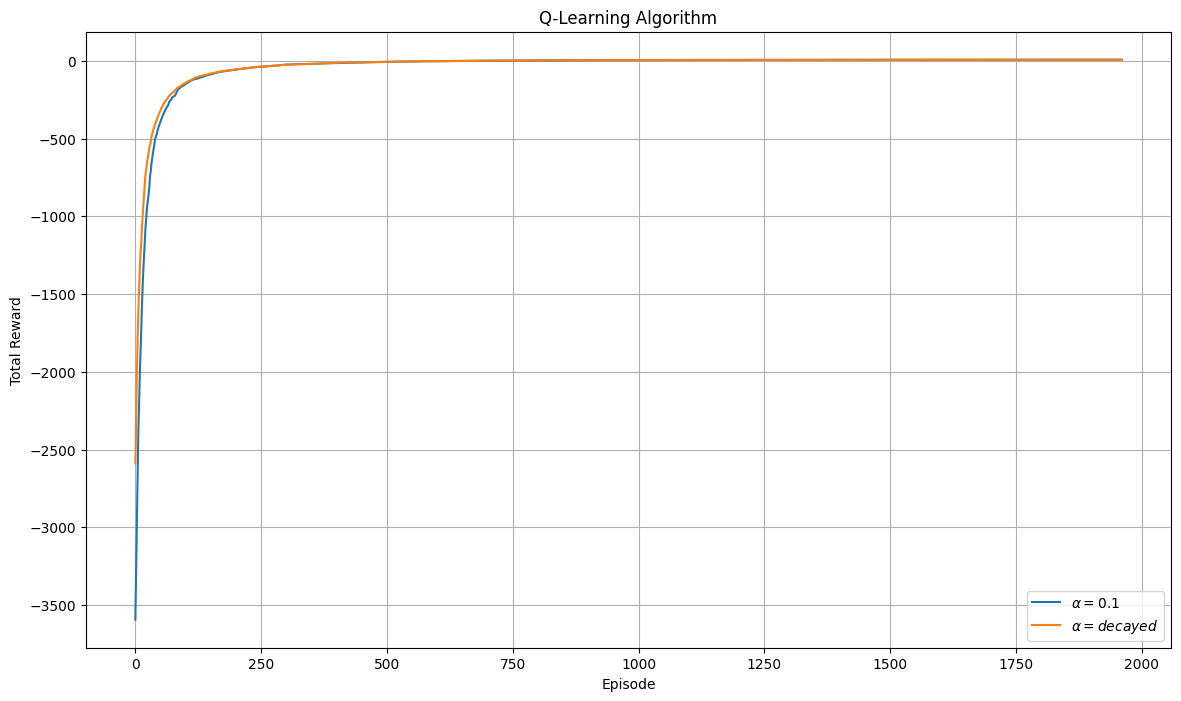

In [19]:
# Attaining the optimal policies
total_reward_fixed_learning, optimal_policy_fixed, optimal_agent_fixed = RunQLearningAgent(is_decay_epsilon=True, is_decay_learning_rate=False)
total_reward_decreasing_learning, optimal_policy_dynamic, optimal_agent_dynamic = RunQLearningAgent(is_decay_epsilon=True, is_decay_learning_rate=True)

# Visualizing the results
plt.figure(figsize=(14,8))
plt.title('Q-Learning Algorithm')
plt.plot(np.convolve(np.mean(total_reward_fixed_learning, axis=0), np.ones(40)/40, mode='valid'), label=r'$\alpha=0.1$')
plt.plot(np.convolve(np.mean(total_reward_decreasing_learning, axis=0), np.ones(40)/40, mode='valid'), label=r'$\alpha=decayed$')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid()
plt.legend()
plt.show()

#### Comparison of the Results
Using a plot, the comparison of the results from the algorithm execution with two learning rate modes, i.e. fixed and decreasing, gets easier. 
It can be seen that both cases of the algorithm eventually converge to the optimal policy, but the case where the learning rate is decreasing has a faster convergence speed and converges to the optimal policy sooner. It's crucial to note that the difference, in this problem, is **not** dramatically huge. That might be due to the simplicity and smallness of the environment we're dealing with. Additionally, the case where the learning rate is decreasing has less regret than the case where the learning rate is constant, and the amount of reward received in each episode is higher. The superiority of the decreasing learning rate case is due to the fact that the agent is trained with a high learning rate at the beginning and gradually decreases the learning rate. This allows the agent to learn a lot from new data at the beginning and rely more on its own experience as its experience increases. As a result, the convergence speed increases and the regret decreases. However, in the case where the learning rate is equal to a small and constant value, the agent's training is slow, resulting in a lower convergence speed and higher regret.



<a name='2-3'></a>

### Question 10:


In this question, the graphical render of optimal policy is shown using *gym* library's built-in graphical functions for this problem. All we need to do is to pass the **optimal policy** we obtained from previous question to the `env.step()` method.

#### Agent with Fixed Learning Rate

In [29]:
env = gym.make('Taxi-v3', render_mode='human', new_step_api=True)
pos = env.reset(seed=STUDENT_NUM)
while (True):
    (pos, _, terminated, _, _) = env.step(
        optimal_agent_fixed.get_optimal_policy(pos))
    time.sleep(0.5)
    if (terminated):
        break
env.close()

#### Agent with Decreasing Learning Rate

In [30]:
env = gym.make('Taxi-v3', render_mode='human', new_step_api=True)
pos = env.reset(seed=STUDENT_NUM)
while (True):
    (pos, _, terminated, _, _) = env.step(
        optimal_agent_dynamic.get_optimal_policy(pos))
    time.sleep(0.5)
    if (terminated):
        break
env.close()

Now that we've successfully witnessed the graphical result, it's time to examine each mode's average runtime, so we can have a better comparison between them on time-consumption territory as well. In order to avoid repeated code, here's a mutual function to measure the average time consumption of each algorithm for 50 episodes of execution:

In [23]:
class color:            # Customize the output's text format in print()
    BOLD = '\033[1;34m' # Set bold and blue text via ANSI escape sequences
    END = '\033[0m'     # Reset text format via ANSI escape sequences
    UNDER = '\033[4m'   # Set underlined text via ANSI escape sequences


def timer(agent, mode:str):
    start = time.time_ns()
    for _ in range(50):
        state = agent.reset()
        rewards = []
        env.render()

        while True:
            action = agent.get_optimal_policy(state)
            next_state, reward, done = agent.take_action(action)
            state = next_state
            rewards.append(reward)
            env.render()

            if done:
                break
    end = time.time_ns()
    avg = (end - start) / 50 / 10**6

    print(f'Average execution time for {color.UNDER}agent with {mode}{color.END}: {color.BOLD}{avg}{color.END} milliseconds')

#### Agent with Fixed Learning Rate

In [25]:
env = gym.make('Taxi-v3', render_mode='ansi')
env.reset()
timer(optimal_agent_fixed, 'fixed learning rate')
env.close()

Average execution time for agent with fixed learning rate: 1.540214 milliseconds


#### Agent with Decreasing Learning Rate

In [26]:
env = gym.make('Taxi-v3', render_mode='ansi')
env.reset()
timer(optimal_agent_dynamic, 'decreasing learning rate')
env.close()

Average execution time for agent with decreasing learning rate: 1.539988 milliseconds


As a final section of [Part 2: Q-Learning Algorithm](#part-2-q-learning-algorithm), we intend to manually visualize the map and the path our agent travels in it with a rough simple string map in terminal. To do so, we need to get the result for **optimal_policy** our agent has found in previous questions. By saving this *optimal_policy* in a variable named *path*, we'll see that it consists of a chain of 13 states our agent travels. Each state is represented by an integer number that will be shown as the output of the following code:

In [27]:
def raw_map():
    # Raw map of my problem
    map = \
        [['-','-','-','-','-','-','-','-','-','-','-'],
        ['|','H',':',':','|',':',':',':',':','G','|'],
        ['|',':',':',':','|',':',':',':',':',':','|'],
        ['|',':',':',':',':',':',':',':',':',':','|'],
        ['|',':','|',':',':',':','|',':',':',':','|'],
        ['|','Y','|',':',':',':','|','B',':',':','|'],
        ['-','-','-','-','-','-','-','-','-','-','-'],
        ]
    print('Raw Map without agent\'s presence:')
    # print(np.array(map), '\n')

    string = ''
    for i in map:
        for j in i:
            if j == ':':
                j = ' '
            string += j + '  '
        string += '\n'
    print(string)
    return map


def visualizer(agent, map):
    state = agent.reset()
    path = []

    while True:
        path.append(state)
        action = agent.get_optimal_policy(state)
        next_state, reward, done = agent.take_action(action)
        state = next_state
        if done:
            break
    print(f'The optimal_policy is a chain of length 13, consisting of these states: \n{path}')

    for coord in path:
        coord = str(coord)
        if len(coord) == 2:
            coord = '0' + coord
        x = int(coord[1])
        y = int(coord[0]) + 1
        map[y][x] = '0'
    print('Map with the agent\'s optimal path:')
    # print(np.array(map), '\n')

    string = ''
    for i in map:
        for j in i:
            if j == ':':
                j = ' '
            elif j == '0':
                j = '\033[1;31m' + '0' + '\033[0m'
            string += j + '  '
        string += '\n'
    print(string)


In [28]:
RAW = raw_map()
print(f'--- {color.BOLD}Agent with Fixed Learning Rate{color.END} ---')
visualizer(optimal_agent_fixed, RAW)

print(f'--- {color.BOLD}Agent with Decreasing Learning Rate{color.END} ---')
visualizer(optimal_agent_dynamic, RAW)

Raw Map without agent's presence:
-  -  -  -  -  -  -  -  -  -  -  
|  H        |              G  |  
|           |                 |  
|                             |  
|     |           |           |  
|  Y  |           |  B        |  
-  -  -  -  -  -  -  -  -  -  -  

--- Agent with Fixed Learning Rate ---
The optimal_policy is a chain of length 13, consisting of these states: 
[152, 252, 272, 372, 472, 476, 376, 276, 256, 236, 136, 116, 16]
Map with the agent's optimal path:
-  -  -  -  -  -  -  -  -  -  -  
|  0        |              G  |  
|  0     0  |  0              |  
|        0     0     0        |  
|     |           |  0        |  
|  Y  |           |  0        |  
-  -  -  -  -  -  -  -  -  -  -  

--- Agent with Decreasing Learning Rate ---
The optimal_policy is a chain of length 13, consisting of these states: 
[152, 252, 272, 372, 472, 476, 376, 276, 256, 236, 136, 36, 16]
Map with the agent's optimal path:
-  -  -  -  -  -  -  -  -  -  -  
|  0     0  |             

It can be seen that in this problem, the number of steps the agent must travel doesn't differ based on the two discussed modes, i.e. *fixed learning rate* or *decreasing learning rate*. However, the path itself does differ, and the difference is shown in the maps above. The path which is printed with red zeroes, is obtained from decoding the states. The first and second digits of each state represent the **y** and **x** coordinates of the agent at that state, respectively. The third digit also shows if the passenger is on-board or not, which we didn't need in the map representations above.

<div style="background-color:azure; border-radius:15px; height:150px; display: flex; align-items: center; ">

<h4 style="color:grey; margin-left:8%; vertical-align:middle; ">by: <br> Mohammad Montazeri
<br>
810699269 </h4>
</div>
